# Question 3

Considere dados apresentados na tabela abaixo referentes aos índices de
desenvolvimento de países (Fonte ONU- 2002, Livro – Análise de dados através de
métodos de estatística multivariada – Sueli A. Mingoti) . Utilize uma rede neural de Kohonen ou Mapa Auto Organizável (SOM) para identificar os aglomerados (Clusters) dos países com indicadores mais similares. Como sugestão considere um SOM bidimensional com vizinhança hexagonal com 25x25 neurônios.

Países          | Expectativa de vida | Educação | PIB | Estabilidade política
:--------------:|:-------------------:|:--------:|:---:|:---------------------:
Reino Unido     |0.88                 |0.99      |0.91 |1.10
Austrália       |0.90                 |0.99      |0.93 |1.26
Canadá          |0.90                 |0.98      |0.94 |1.24
Estados Unidos  |0.87                 |0.98      |0.97 |1.18
Japão           |0.93                 |0.93      |0.93 |1.20
França          |0.89                 |0.97      |0.92 |1.04
Cingapura       |0.88                 |0.87      |0.91 |1.41
Argentina       |0.81                 |0.92      |0.80 |0.55
Uruguai         |0.82                 |0.92      |0.75 |1.05
Cuba            |0.85                 |0.90      |0.64 |0.07
Colômbia        |0.77                 |0.85      |0.69 |-1.36
Brasil          |0.71                 |0.83      |0.72 |0.47
Paraguai        |0.75                 |0.83      |0.63 |-0.87
Egito           |0.70                 |0.62      |0.60 |0.21
Nigéria         |0.44                 |0.58      |0.37 |-1.36
Senegal         |0.47                 |0.37      |0.45 |-0.68
Serra Leoa      |0.23                 |0.33      |0.27 |-1.26
Angola          |0.34                 |0.36      |0.51 |-1.98
Etiópia         |0.31                 |0.35      |0.32 |-0.55
Moçambique      |0.24                 |0.37      |0.36 |0.20
China           |0.76                 |0.80      |0.61 |0.39
...             |...                  |...       |...  |...
Média           |0.69                 |0.75      |0.68 |0.16
Desvio padrão   |0.24                 |0.249     |0.229|1.056

Authors: 
  - [Morsinaldo de Azevedo Medeiros](https://github.com/Morsinaldo)
  - [Thaís de Araújo de Medeiros](https://github.com/thaisaraujo2000)


## Setup

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=fe8c4ed15c0aa6aa4413d4986b75f4e4d5ae85b9621b8d180394c697e3e4acff
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

## Preparing Data

In [ ]:
# writing the data
countries = ['Reino Unido', 'Austrália', 'Canadá', 'Estados Unidos', 'Japão', 'França', 'Cingapura', 'Argentina', 'Uruguai', 'Cuba', 'Colômbia',
          'Brasil', 'Paraguai', 'Egito', 'Nigéria', 'Senegal', 'Serra Leoa', 'Angola', 'Etiópia', 'Moçambique', 'China']
expected_life = [0.88, 0.90, 0.90, 0.87, 0.93, 0.89, 0.88, 0.81, 0.82, 0.85, 0.77, 0.71, 0.75, 0.70, 0.44, 0.47, 0.23, 0.34, 0.31, 0.24, 0.76]
education = [0.99, 0.99, 0.98, 0.98, 0.93, 0.97, 0.87, 0.92, 0.92, 0.90, 0.85, 0.83, 0.83, 0.62, 0.58, 0.37, 0.33, 0.36, 0.35, 0.37, 0.80]
pib = [0.91, 0.93, 0.94, 0.97, 0.93, 0.92, 0.91, 0.80, 0.75, 0.64, 0.69, 0.72, 0.63, 0.60, 0.37, 0.45, 0.27, 0.51, 0.32, 0.36, 0.80]
politic = [1.10, 1.26, 1.24, 1.18, 1.20, 1.04, 1.41, 0.55, 1.05, 0.07, -1.36, 0.47, -0.87, 0.21, -1.36, -0.68, -1.26, -1.98, -0.55, 0.20, 0.39]

In [ ]:
expected_life_mean = 0.69
expected_life_std = 0.24

education_mean = 0.75
education_std = 0.249

pib_mean = 0.68
pib_std = 0.229

politic_mean = 0.16
politic_std = 1.056

In [ ]:
# create a dataframe
df = pd.DataFrame({'expected_life': expected_life,
                    'education': education, 
                    'pib': pib, 
                    'politic': politic,
                    'countries': countries
                    })
df.head()

,expected_life,education,pib,politic,countries
0,0.88,0.99,0.91,1.10,Reino Unido
1,0.90,0.99,0.93,1.26,Austrália
2,0.90,0.98,0.94,1.24,Canadá
3,0.87,0.98,0.97,1.18,Estados Unidos
4,0.93,0.93,0.93,1.20,Japão


## Instantiate Minisom

Create a minisom model to cluster the data in 25x25 neurons and hexagonal topology

In [ ]:
neurons = 25
input_len = 4

# instantiate a minisom model 
som = MiniSom(neurons, neurons, input_len, sigma=1.0, learning_rate=0.5, topology='hexagonal', neighborhood_function='gaussian', random_seed=33)

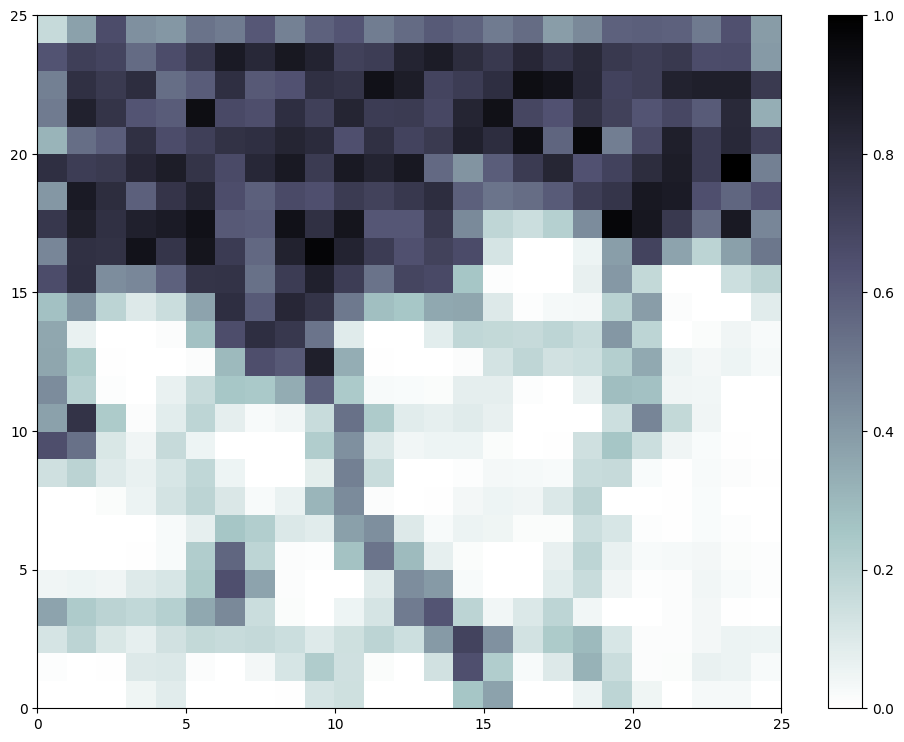

In [ ]:
iterations = 50000

# train the model
som.train(df.drop('countries',axis=1).values, iterations)

# plot the data
plt.figure(figsize=(12, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.show()

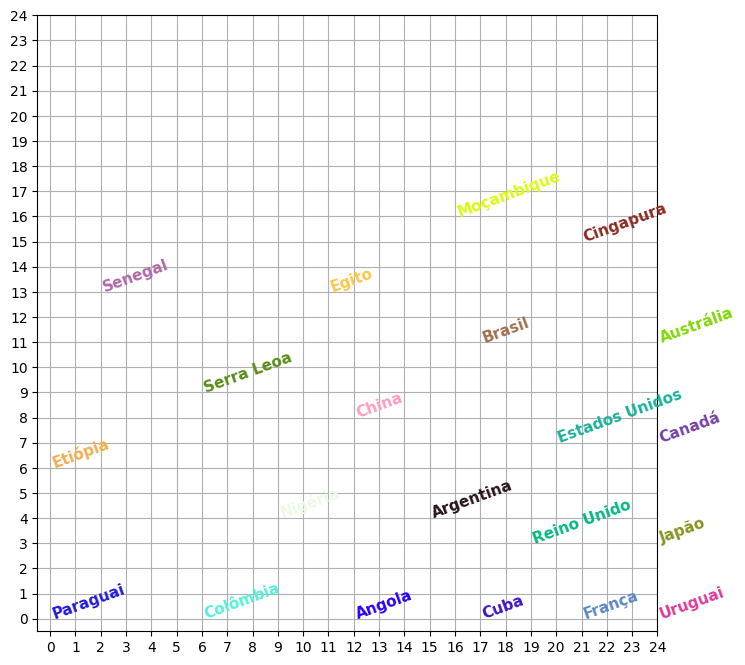

In [ ]:
plt.figure(figsize=(8,8))
wmap = {}
im = 0

for x, t in zip(df.drop('countries', axis=1).values, df.countries.values):
  w = som.winner(x)
  wmap[w] = im
  plt.text(
      w[0], w[1], str(t),
      rotation=20,
      c=np.random.rand(3,),
      fontdict={'weight': 'bold', 'size': 11}
  )
  im = im+1

plt.axis([-0.5,9.5,-0.5,9.5])
plt.xticks(range(25))
plt.yticks(range(25))
plt.grid()

plt.show()

Com isso, é possível observar que os países com características em comum ficaram agrupados. Por exemplo, país mais desenvolvidos ficaram mais próximos, enquanto que países menos desenvolvidos tendeream a ficar mais agrupados.